In [6]:
from shared.ingest import download_default_s3
download_default_s3()

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
orders = pd.read_csv('tempdata/olist_orders_dataset.csv')
datecols = orders.loc[:,'order_purchase_timestamp':].columns
for col in datecols:
    orders[col] = pd.to_datetime(orders[col])

In [48]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

<AxesSubplot:xlabel='order_purchase_timestamp'>

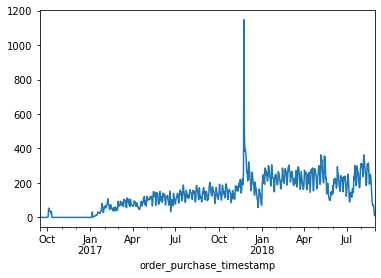

In [49]:
daily_n_orders = orders[orders['order_status'] == 'delivered'].set_index('order_purchase_timestamp').resample('d')['order_id'].count()
f, ax = plt.subplots()
daily_n_orders.plot()

In [50]:
%matplotlib inline

<AxesSubplot:>

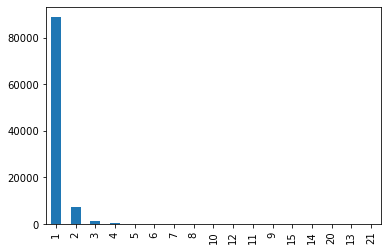

In [66]:
items = pd.read_csv('tempdata/olist_order_items_dataset.csv')
items.groupby('order_id')['order_item_id'].count().value_counts().plot(kind='bar')

We have relatively purchases with multiple items. Thus, we can treat each item purchase as an individual purchase.

/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


<AxesSubplot:xlabel='order_purchase_timestamp'>

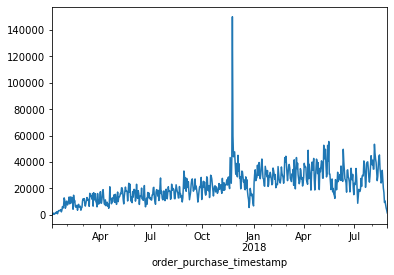

In [115]:
delivered = items.merge(orders[orders['order_status'] == 'delivered'], on='order_id')
products = pd.read_csv('tempdata/olist_products_dataset.csv')

delivered = delivered.merge(products[['product_id', 'product_category_name']], how='left', on='product_id')
delivered = delivered.set_index('order_purchase_timestamp')
delivered = delivered['2017-01-01':].copy()
daily_revenues = delivered['price'].resample('d').sum()
daily_revenues.plot()

In [96]:
daily_by_category = delivered.groupby('product_category_name').resample('d')['price'].agg(['sum','count'])

In [106]:
category_revenues_wide = daily_by_category.reset_index().pivot(columns='product_category_name',
                                      index='order_purchase_timestamp',values='sum')
category_revenues_wide = category_revenues_wide.fillna(0)


<AxesSubplot:xlabel='product_category_name', ylabel='product_category_name'>

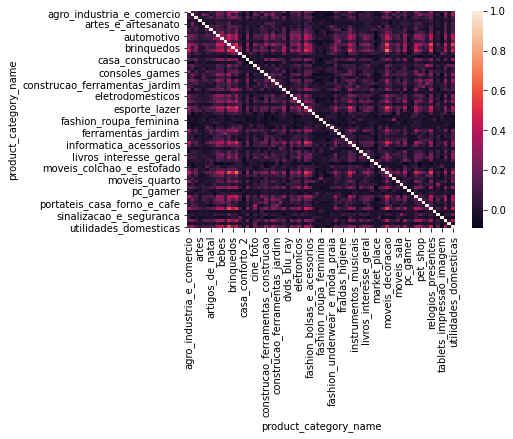

In [116]:
sns.heatmap(category_revenues_wide.corr())

<AxesSubplot:ylabel='Frequency'>

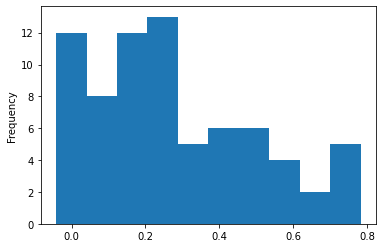

In [142]:
category_corrs_with_total = category_revenues_wide.apply(lambda x: np.corrcoef(daily_revenues, x)[0, 1])
category_corrs_with_total.plot(kind='hist')

In [109]:
top5_cats = category_revenues_wide.sum().sort_values().tail(5).index
category_revenues_wide['top5_cats']

KeyError: 'top5_cats'

In [93]:
delivered.groupby('product_category_name')['price'].resample('d').agg(['count','sum'])

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [19]:
orders.set_index('order_purchase_timestamp')

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...
2017-03-09 09:54:05,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
2018-02-06 12:58:58,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
2017-08-27 14:46:43,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
